In [63]:
import cma
import os
import numpy as np
import functionsne as fun 
import time
import shutil
import matplotlib.pylab as plt

This part is for determining input parameters

### Structural input

In [64]:
code='new.wls' #name of the mathematica code
d=141 #periodic length of grating 140

fd=50 #the filling factor out of 10
fbd=50#filling factor of bottom layer out of 10
ftd=50 #filling factor of top layer out of 10
t=31 #grating thickness middle part
tc=10 #thickness of other parts
rho=10
delta=0.0096

### Experimental data path

In [65]:
exp='exp/average/'
rods_number=[1,3,5]

### Cma-es package input

In [66]:
dimension=6 #number of structural parameters to be predicted.
tol=10e-6
X=[d,fd,fbd,ftd,t,rho]#series of initial guess 
popsize=10 #number of different solutions each time package provides, and need to be evaluated
std=3.5

### Output files

In [67]:
output=open('output.txt','w')
log=open('log.txt','w')
product=open('product.txt','w')
cnt=0

### Code criteria 

In [68]:
threshold=0.003 #minium which result should be in this span to have an acceptable result
sleep_time=30 #in seconds. This is the time for "popsize" number of simulation to be completed. 
cnt=0

### Function for fitting

In [69]:
Ubound=np.array([141.75,51.5,51.5,51.5,35,11])
Lbound=np.array([138,46.5,46.5,46.5,30,6])
es = cma.CMAEvolutionStrategy( X, std,{'popsize':popsize,'tolfun':tol,'bounds':[Lbound,Ubound]})

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 6 (seed=562270, Wed Jun 29 14:41:08 2022)


start the game
[141.54541158  50.13555969  47.74676181  50.87615157  33.5798692
   7.93529877]
141.54541157848695, 50.135559694836694, 47.74676180962121, 50.876151567046165, 33.579869202164645, 7.935298767122619
fun.simulation6(new.wls,141.54541157848695, 50.135559694836694, 47.74676180962121, 50.876151567046165, 33.579869202164645, 7.935298767122619)
v0=141.54541157848695 v1=50.135559694836694 v2=47.74676180962121 v3=50.876151567046165 v4=33.579869202164645 v5=7.935298767122619
sleep time is over
0.000697602767104191
70
4.48313477189646e-05
0
2.5458306842673184e-05
0
fitness number for rod 1 is 0.9480906045426605


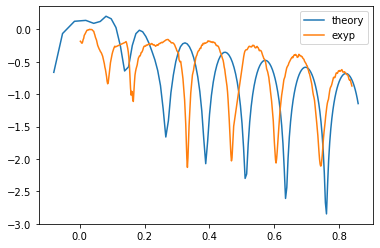

fitness number for rod 3 is 0.19068410968048044


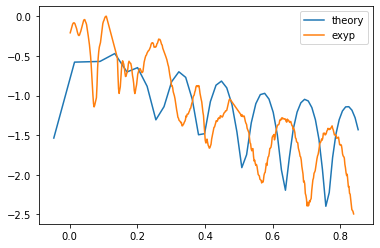

fitness number for rod 5 is 0.06497628037809026


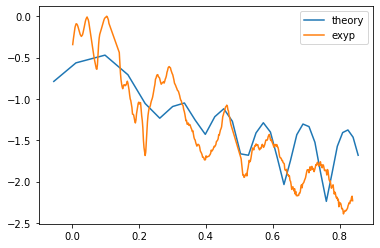

fitness is 0.4012503315337437
0 simulation number0

[139.60686851  47.53284286  49.86157719  50.73724377  30.03996792
   9.13779452]
139.60686851051207, 47.53284285817235, 49.86157719463465, 50.73724376560328, 30.03996791927856, 9.137794523449536
fun.simulation6(new.wls,139.60686851051207, 47.53284285817235, 49.86157719463465, 50.73724376560328, 30.03996791927856, 9.137794523449536)
v0=139.60686851051207 v1=47.53284285817235 v2=49.86157719463465 v3=50.73724376560328 v4=30.03996791927856 v5=9.137794523449536
sleep time is over
0.003882752402329384
99
7.92317973281744e-05
0
0.00012085177646912765
14
fitness number for rod 1 is 0.551692298139447


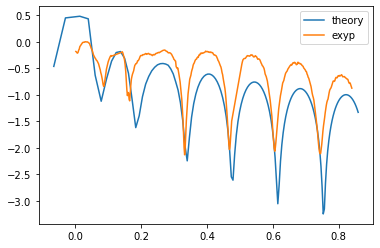

fitness number for rod 3 is 0.15732201756747521


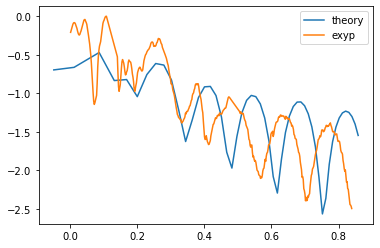

fitness number for rod 5 is 0.072140642951763


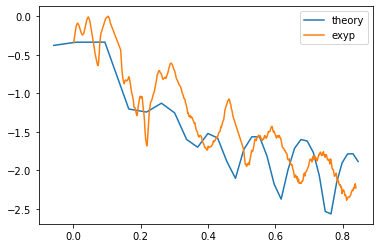

fitness is 0.26038498621956174
0 simulation number1

[138.54532044  47.88814395  50.13990274  50.86937008  30.43415492
   8.06957438]
138.5453204404152, 47.888143950275996, 50.139902742440356, 50.86937007649475, 30.434154916455014, 8.069574382299544
fun.simulation6(new.wls,138.5453204404152, 47.888143950275996, 50.139902742440356, 50.86937007649475, 30.434154916455014, 8.069574382299544)
v0=138.5453204404152 v1=47.888143950275996 v2=50.139902742440356 v3=50.86937007649475 v4=30.434154916455014 v5=8.069574382299544


KeyboardInterrupt: 

In [71]:
while not es.stop():
    fit=np.zeros((1,popsize))
    solutions=es.ask()     
    print('start the game')
    for i in range(popsize):
        print(solutions[i])
        print(fun.seq(np.array(solutions[i]).tolist()))
        print('fun.simulation6(%s,%s)'%(code,fun.seq(np.array(solutions[i]).tolist())))
        v=np.array(solutions[i]).tolist()
        s=fun.simulation6(code,v[0],v[1],v[2],v[3],v[4],v[5]) 
        print('v0=%s v1=%s v2=%s v3=%s v4=%s v5=%s'%(v[0],v[1],v[2],v[3],v[4],v[5]))
        time.sleep(sleep_time)
        print('sleep time is over')
        
        for j in rods_number:
            fff=open('dyt/rod=%s.txt'%(j),'r')
            d=fff.readlines()
            fdat=open('dyt/rods=%s.txt'%j,'w')
            mat=[]
            lnd=len(d)
            for lines in range(len(d)):
                lns=d[lines]
                for let in range(len(lns)):
                    if lns[let]=='A':
                        mat.append(lines)
            n=list(set(mat))
            new = [x for x in range(len(d)) if x not in n]
            for numbers in new:
                fdat.write(d[numbers]+'\n')
            fff.close()
            fdat.close()
            fdata=np.loadtxt('dyt/rods=%s.txt'%j) 
            fdatas=fdata[:,1]
#            fdatas=smooth(fdata[:,1],1)
            maxi=np.max(fdatas)
            print(maxi)
            dta=open('dyt/rodm=%s.txt'%j,'w')
            for k in range(len(fdata)):
                if fdata[k,1]>0 and fdata[k,0]<0.95:
                    dta.write('%s %s\n'%(fdata[k,0],np.log10(fdatas[k]/maxi)))
            dta.close()
            
            fdata_m=np.loadtxt('dyt/rodm=%s.txt'%j)
            exp_m=('exp/average/final_average/m=%s.dat'%j)
            sim_m=('dyt/rodm=%s.txt'%j) 
            deltfit=fun.findmine(exp_m,sim_m,delta)
            #print('deltfit is %s'%deltfit)
            dta_m=open('dyt/rodn=%s.txt'%j,'w')
            for k in range(len(fdata_m)):
                dta_m.write('%s %s\n'%(fdata_m[k,0]-0.09,(fdata_m[k,1]+deltfit)))
            dta_m.close()
            
        fitn_matrix=[]
        for m in rods_number:
            sim_data=('dyt/rodn=%s.txt'%m)
            exp_data=('exp/average/final_average/m=%s.dat'%m)
            fit_number=fun.fity(sim_data,exp_data)
            print('fitness number for rod %s is %s'%(m,fit_number))
            fitn_matrix.append(fit_number)
            #visualization
            thery=np.loadtxt('dyt/rodn=%s.txt'%m)
            exyp=np.loadtxt('exp/average/final_average/m=%s.dat'%m)
            plt.plot(thery[:,0],(thery[:,1]),label='theory')
            plt.plot(exyp[:,0],(exyp[:,1]),label='exyp')
            plt.legend()
            #plt.yscale('log')
            plt.show()           
        fitness_number=np.mean(fitn_matrix)
        print('fitness is %s'%fitness_number)
        fit[0][i]=fitness_number
        log.write('%s simulation number%s\n'%(cnt,i))
        print('%s simulation number%s\n'%(cnt,i))
    fit=np.array(fit).tolist()[0]
    output.write('%s %s %s \n'%(cnt,solutions,fit)) 
    print('%s %s %s \n'%(cnt,solutions,fit))
    es.tell(solutions,fit)
    ftn=es.result[1]
    newsol=es.result[0]
    cnt+=1
    output.write('new solution is %s with %s as fitness criteria\n\n #### \n'%(newsol,ftn))
    print('new solution is %s with %s as fitness criteria\n\n##########\n'%(newsol,ftn))
    product.write('%s %s\n'%(cnt,ftn)) 
    
    if (np.abs(ftn)<threshold):
        break
        output.write('last line shows the solution')
output.close()
log.close()
product.close()
    
    

In [30]:
print(np.abs(-6))

6


In [12]:
a=3
c=5
print(np.max([a,c]))

5


In [19]:
solutions=es.ask() 
print(solutions[0])
print(func.seq(np.array(solutions[0]).tolist()))
#print('func.simulation6(%s,%s)'%(code,func.seq(np.array(solutions[i]).tolist())))

[123.1803174    4.97462669   5.72933444   6.41543749  29.04282089
  12.35085007]
123.180317401, 4.9746266915, 5.72933444175, 6.41543748652, 29.0428208887, 12.3508500701


In [26]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth